# Health Status Prediction - Heart Disease

The information in this dataset is from a study in a high-risk region of South Africa in 1983. It contains 10 factors:


*   sbp: Systolic Blood Pressure
*   tobacco: cumulative tobacco (kg)
*   ldl: low density lipoprotein (bad cholesterol)
*   adiposity: a nummeric vector
*   famhist: family history of heart disease
*   typea: type-A behavior
*   obesity: a numeric vector
*   alcohol: alcohol consumption
*   age: age at onset
*   chd: response, coronary heart disease

All of the participants in the study were male.











In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


In [ ]:
import pandas as pd

heart = pd.read_csv("heart_disease.csv")
heart.head(n=10)

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


In [ ]:
heart = heart.drop('ind',1)

Now that we've gotten a glimpse into the raw data, let's get a quick summary of the information included in this DataFrame.

We can start with the number of heart disease positive patients in the study compared to the number of negative patients.

Heart disease positive patients:  146
Heart disease negative patients:  264
Percent of patients that are positive:  35.61 %


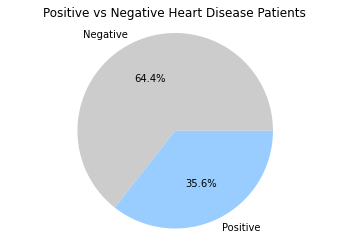

In [ ]:
import matplotlib.pyplot as plt

hd_pos = len(heart[heart['chd'] == 1])
hd_neg = len(heart[heart['chd'] == 0])

print('Heart disease positive patients: ', hd_pos)
print('Heart disease negative patients: ', hd_neg)
print('Percent of patients that are positive: ', round(hd_pos / (hd_pos + hd_neg) * 100, 2), '%')


fig1, ax1 = plt.subplots()
ax1.pie([hd_neg, hd_pos], labels = ['Negative', 'Positive'], autopct='%1.1f%%', colors=['#cccccc','#99CCFF'])
ax1.axis('equal')
plt.title("Positive vs Negative Heart Disease Patients")

plt.show()

To get more statistical insight, we can simply use the .describe() method to produce a table showing the average, median, standard deviation, and the quartiles for each risk factor included in the study.

In [ ]:
heart.describe()

,ind,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,205.863415,137.831707,3.750244,4.778268,25.580512,53.251220,26.178683,16.914220,43.409756,0.356098
std,118.902544,20.006319,4.634952,2.019603,7.680771,9.963886,4.200210,24.466092,14.400248,0.479430
min,1.000000,101.000000,0.000000,0.980000,7.120000,13.000000,17.750000,0.000000,15.000000,0.000000
25%,103.250000,124.000000,0.100000,3.300000,20.152500,47.000000,23.237500,0.510000,32.000000,0.000000
50%,205.500000,134.000000,2.180000,4.400000,26.400000,54.000000,25.880000,7.780000,45.000000,0.000000
75%,308.750000,148.000000,5.600000,5.895000,31.320000,60.000000,28.505000,23.395000,56.000000,1.000000
max,411.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


Using the quartiles seen in the above .describe() method, we can see the distribution of the patients by age based on their family history of heart disease. 

As you can see at a glance based on these boxes, patients with a family history of heart disease had a later average onset of the disease. I have to wonder if this is because those patients were aware of their risk for heart disease and took more care to avoid other contributing factors.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Negative         AxesSubplot(0.1,0.15;0.363636x0.75)
Positive    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

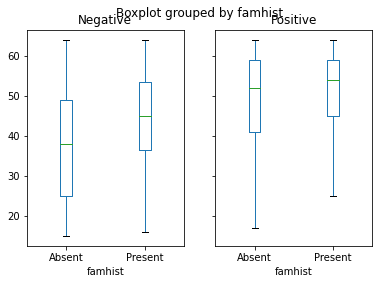

In [ ]:
renamed_chd = heart.replace({1:'Positive',0: 'Negative'})
pos_neg_group = renamed_chd.groupby('chd')
pos_neg_group.boxplot(by = 'famhist', column = ['age'], grid = False)

I'd be curious to see the average age of the study, split by positive and negative patients. The way the information was recorded, the patients who are heart disease positive have the age of onset listed, those who are negative have their age at the time of the trial.

The average age of all participants in the studys is  43.4
The average age of onset for positive patients is  50.5
The average age of the negative participants is  39.5


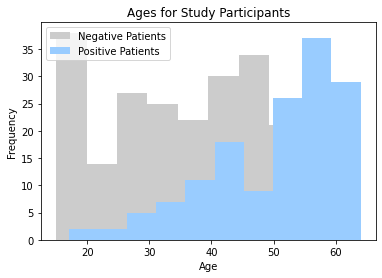

In [ ]:
print('The average age of all participants in the studys is ', round(heart['age'].mean(),1))
pos_heart = heart.groupby('chd').get_group(1)
print('The average age of onset for positive patients is ', round(pos_heart['age'].mean(),1))
neg_heart = heart.groupby('chd').get_group(0)
print('The average age of the negative participants is ', round(neg_heart['age'].mean(),1))

neg_heart['age'].plot.hist(color='#cccccc', label='Negative Patients')
pos_heart['age'].plot.hist(color='#99CCFF', label='Positive Patients')

plt.title('Ages for Study Participants')
plt.xlabel('Age')
plt.legend()

In addition to looking at the ages of participants in the study, we can find out what the most common blood pressure was for both positive and negative patients.

In [ ]:
from statistics import mode

pos_heart = heart.groupby('chd').get_group(1)
print('The most common blood pressure for heart disease positive patients is % s' % mode(pos_heart['sbp']))
neg_heart = heart.groupby('chd').get_group(0)
print('The most common blood pressure for heart disease positive patients is % s ' % mode(neg_heart['sbp']))

The most common blood pressure for heart disease positive patients is 136
The most common blood pressure for heart disease positive patients is 128 


Let's take a look at the correlations between some of the other risk factors included in this dataset. We always see the advertisements on TV about your cholesterol, and are advised to keep the "bad cholesterol" low. We assume that this is because it contributes to obesity, which causes many other health problems, including heart disease. We can check to see if there is a connection between having higher levels of that cholesterol and being obese.

              ldl   obesity
ldl      1.000000  0.307482
obesity  0.307482  1.000000


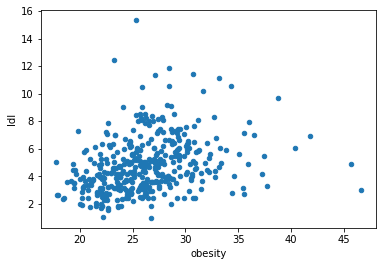

In [ ]:
cholest_table = heart.drop(heart.columns.difference(['ldl','obesity']), 1)
print(cholest_table.corr())
cholest_table.plot.scatter('obesity','ldl')

To take a look at how all of the factors in this dataset contribute to heart disease, we can look at a radar chart. This will show us which risk factors have the highest correlation to coronary heart disease.

In [ ]:
#correlations for all factors to chd
import plotly.express as px

heart_corr = heart.corr()
heart_corr = heart_corr.drop(index='chd')
heart_corr_dict = dict(heart_corr['chd'])
print(heart_corr_dict)
df = pd.DataFrame(dict(r = list(heart_corr_dict.values()), theta = list(heart_corr_dict.keys())))
fig = px.line_polar(df, r="r", theta="theta", line_close=True)

fig.show()

{'sbp': 0.18266013274366819, 'tobacco': 0.2987772212603114, 'ldl': 0.2638339921771576, 'adiposity': 0.2481813929705367, 'typea': 0.12197958749280863, 'obesity': 0.09795019577013472, 'alcohol': 0.05732472776816473, 'age': 0.36660293963287616}
